# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
#set up list
lat = []
lng = []
country = []
city_names = []
temp = []
humid = []
cloudy = []
wind_speed = []
date = []
count = 0

#set url and key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#print beginning statement
print("Begin Data Retrieval \n -------------------------")

#loop through cities
for city in cities:

#exception
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        city_names.append(response["name"])
        temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloudy.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        cityname = response ["name"]
        count += 1
        print(f"Processing Record {count} | {cityname}")
    except:
        print(f"{city} not found, skip to next...")
        
        
        
#print end statement        
print(f"------------------------- \n Retrieval Complete \n Total of {count} cities processed. \n -------------------------")

Begin Data Retrieval 
 -------------------------
Processing Record 1 | Mar del Plata
Processing Record 2 | Palmer
Processing Record 3 | São Filipe
Processing Record 4 | Hithadhoo
Processing Record 5 | Tuatapere
Processing Record 6 | Presidente Venceslau
Processing Record 7 | Serenje
samusu not found, skip to next...
Processing Record 8 | Albany
Processing Record 9 | Hobart
Processing Record 10 | Upernavik
belushya guba not found, skip to next...
Processing Record 11 | New Norfolk
Processing Record 12 | Carnarvon
Processing Record 13 | Tuktoyaktuk
Processing Record 14 | Lerwick
Processing Record 15 | Ushuaia
mys shmidta not found, skip to next...
Processing Record 16 | San Ramon
Processing Record 17 | Priargunsk
Processing Record 18 | Turukhansk
Processing Record 19 | Dubbo
Processing Record 20 | Dwārka
Processing Record 21 | Khatanga
Processing Record 22 | Uglovoye
Processing Record 23 | Arraial do Cabo
Processing Record 24 | Coahuayana Viejo
Processing Record 25 | Jumla
Processing Rec

bur gabo not found, skip to next...
Processing Record 221 | Evensk
Processing Record 222 | Nizwá
Processing Record 223 | Aksay
Processing Record 224 | Mugumu
tabulbah not found, skip to next...
marcona not found, skip to next...
Processing Record 225 | Nome
jiddah not found, skip to next...
Processing Record 226 | Lebu
Processing Record 227 | Isangel
Processing Record 228 | Alice Springs
Processing Record 229 | Broome
Processing Record 230 | Rio Claro
Processing Record 231 | Manta
Processing Record 232 | Grindavik
Processing Record 233 | Nanortalik
Processing Record 234 | Tautira
Processing Record 235 | Karratha
Processing Record 236 | Klaksvík
Processing Record 237 | Ust'ye
Processing Record 238 | Longyearbyen
Processing Record 239 | Srednekolymsk
Processing Record 240 | Predejane
Processing Record 241 | Baykit
Processing Record 242 | Muscat
Processing Record 243 | Raudeberg
Processing Record 244 | Chapais
Processing Record 245 | Deputatsky
Processing Record 246 | Gainesville
Processi

Processing Record 441 | Atambua
Processing Record 442 | Artvin Province
Processing Record 443 | Kahului
Processing Record 444 | Krasnosel'kup
kazalinsk not found, skip to next...
Processing Record 445 | Foso
Processing Record 446 | Buraidah
Processing Record 447 | Camacha
Processing Record 448 | Lagoa
Processing Record 449 | Mount Isa
Processing Record 450 | Point Fortin
Processing Record 451 | Bull Savanna
Processing Record 452 | Santa Fe
Processing Record 453 | Saint-Pierre
Processing Record 454 | Magdalena
Processing Record 455 | Villa Carlos Paz
tabiauea not found, skip to next...
Processing Record 456 | Nilai
Processing Record 457 | Tocache
Processing Record 458 | Vilyuysk
Processing Record 459 | Slyudyanka
Processing Record 460 | Vila
Processing Record 461 | Bhatkal
Processing Record 462 | Fernie
Processing Record 463 | Kungurtug
Processing Record 464 | Erenhot
Processing Record 465 | Zharkent
Processing Record 466 | Beihai
burica not found, skip to next...
Processing Record 467 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create pandas dataframe using data retrieved
weather_df = pd.DataFrame({
    "Country" : country,
    "City" : city_names,
    "Latitude" : lat,
    "Longitude" : lng,
    "Max Temperature (F)" : temp,
    "Humidity (%)" : humid,
    "Cloudiness (%)" : cloudy,
    "Wind Speed (mph)" : wind_speed,
    "Date" : date    
})

In [5]:
#display dataframe
weather_df
#save dataframe to csv file
weather_df.to_csv("../output_data/cities_jh.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
hum_over100 = weather_df.loc[weather_df["Humidity (%)"] > 100]
len(hum_over100)

0

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.loc[weather_df["Humidity (%)"] <= 100]
clean_city_data
clean_city_data.to_csv("../output_data/clean_city_data.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

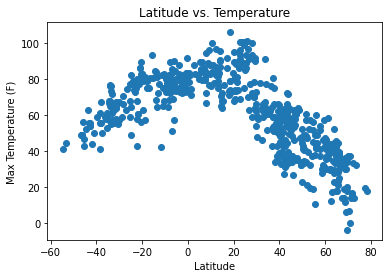

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max Temperature (F)"])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig("../Images/latvstemp.png")

This plot is analyzing the relationship between latitude and temperature.

## Latitude vs. Humidity Plot

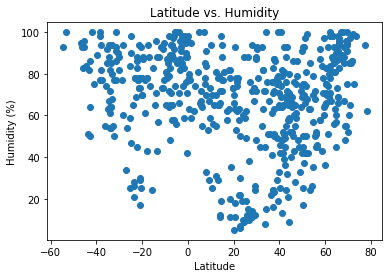

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Humidity (%)"])
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig("../Images/latvshum.png")

This plot analyzes humidity and latitude.

## Latitude vs. Cloudiness Plot

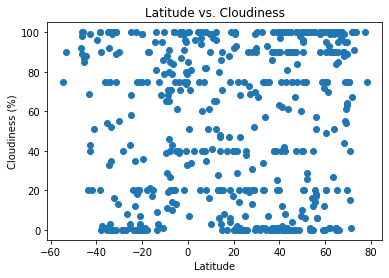

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Cloudiness (%)"])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
plt.savefig("../Images/latvscloud.png")

This plot analyzes latitude vs cloudiness.

## Latitude vs. Wind Speed Plot

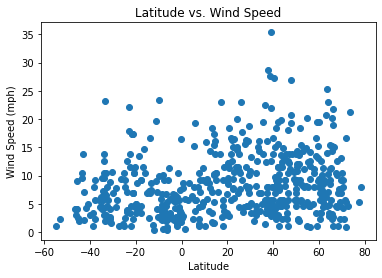

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Wind Speed (mph)"])
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.savefig("../Images/latvswind.png")

This plot analyzes wind speed (mph) and latitude.

## Linear Regression

In [12]:
northern_hem = clean_city_data.loc[clean_city_data["Latitude"] >= 0]
southern_hem = clean_city_data.loc[clean_city_data["Latitude"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r = -0.85


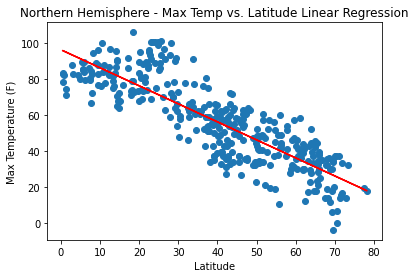

<Figure size 432x288 with 0 Axes>

In [13]:
import scipy.stats as st
#define linear regression function
x=northern_hem["Latitude"]
y=northern_hem["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_value = x * slope + intercept
linear_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r = {round(st.pearsonr(x,y)[0],2)}")
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig("../Images/northmaxtemplinear.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r = 0.68


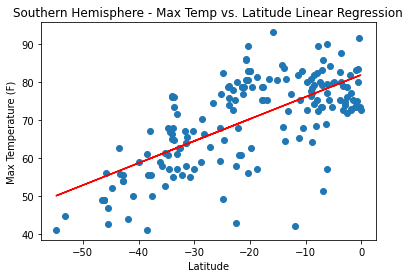

<Figure size 432x288 with 0 Axes>

In [23]:
x=southern_hem["Latitude"]
y=southern_hem["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_value = x * slope + intercept
linear_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r = {round(st.pearsonr(x,y)[0],2)}")
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig("../Images/southernmaxtemplinear.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = 0.23


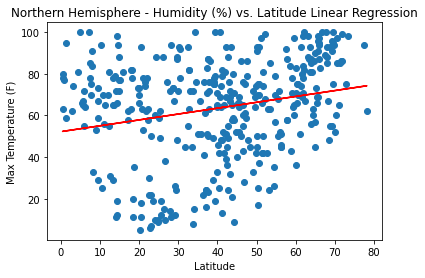

<Figure size 432x288 with 0 Axes>

In [15]:
x=northern_hem["Latitude"]
y=northern_hem["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_value = x * slope + intercept
linear_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r = {round(st.pearsonr(x,y)[0],2)}")
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig("../Images/northhumidlin.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = 0.04


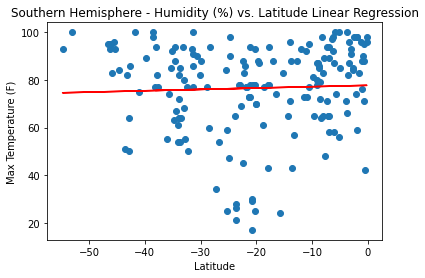

<Figure size 432x288 with 0 Axes>

In [16]:
x=southern_hem["Latitude"]
y=southern_hem["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_value = x * slope + intercept
linear_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r = {round(st.pearsonr(x,y)[0],2)}")
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig("../Images/southhumidlin.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = 0.19


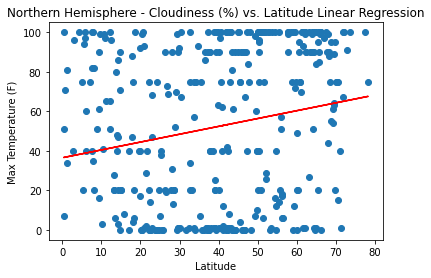

<Figure size 432x288 with 0 Axes>

In [17]:
x=northern_hem["Latitude"]
y=northern_hem["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_value = x * slope + intercept
linear_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r = {round(st.pearsonr(x,y)[0],2)}")
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig("../Images/northcloudlin.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = 0.06


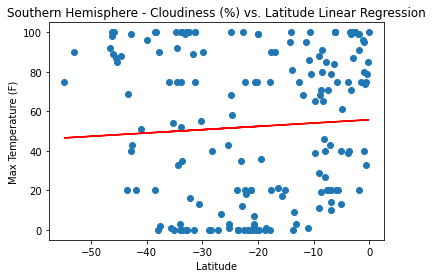

<Figure size 432x288 with 0 Axes>

In [18]:
x=southern_hem["Latitude"]
y=southern_hem["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_value = x * slope + intercept
linear_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r = {round(st.pearsonr(x,y)[0],2)}")
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig("../Images/southcloudlin.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = 0.04


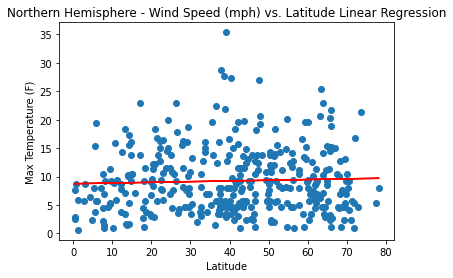

<Figure size 432x288 with 0 Axes>

In [19]:
x=northern_hem["Latitude"]
y=northern_hem["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_value = x * slope + intercept
linear_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r = {round(st.pearsonr(x,y)[0],2)}")
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig("../Images/northwindlin.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = -0.06


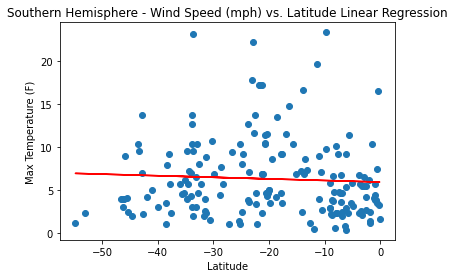

<Figure size 432x288 with 0 Axes>

In [20]:
x=southern_hem["Latitude"]
y=southern_hem["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_value = x * slope + intercept
linear_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r = {round(st.pearsonr(x,y)[0],2)}")
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig("../Images/southwindlin.png")